In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("datos_financieros.csv")

# Mostramos las primeras filas del archivo
print("Primeras filas del archivo CSV:")
display(df.head(8))

Primeras filas del archivo CSV:


,fecha,ticker,Apertura,cierre,máximo,Mínimo,Volumen
0,2020-01-01,AAPL,418.329266,422.183607,0.000000,478.505385,983985.0
1,2020-01-02,AMZN,452.915547,295.447329,202.651444,229.323576,182256.0
2,2020-01-03,AAPL,349.522916,327.785865,0.000000,346.400297,49259.0
3,2020-01-04,MSFT,303.873695,487.685560,137.595225,124.163491,380147.0
4,2020-01-05,TSLA,367.088014,197.656268,NaN,230.184758,395956.0
5,2020-01-06,AAPL,181.750355,458.996483,278.457528,474.330502,434422.0
6,2020-01-07,TSLA,424.123590,218.979857,225.215722,360.105333,35546.0
7,2020-01-08,MSFT,364.446982,357.798151,466.892115,359.041151,969463.0


In [5]:
# Mostrar las últimas 10 filas
print(df.tail(10))

           fecha ticker    Apertura      cierre      máximo      Mínimo  \
1990  2025-06-13   MSFT  129.399673  311.759313  444.197145  129.870353   
1991  2025-06-14  GOOGL  396.442896  262.381881  447.605852    0.000000   
1992  2025-06-15   TSLA  464.618978  153.304009  352.270027  119.483389   
1993  2025-06-16  GOOGL  142.827046  298.974027  299.653073  226.881217   
1994  2025-06-17   MSFT  393.105677    0.000000         NaN  246.808856   
1995  2025-06-18   TSLA  179.909754  196.926249  360.701750  208.228468   
1996         NaN   TSLA  101.574809  465.770203  130.835366         NaN   
1997  2025-06-20   AAPL  278.951913  315.104386  346.095212  164.384030   
1998  2025-06-21   MSFT    0.000000  231.664402    0.000000  443.295377   
1999  2025-06-22   MSFT  271.269758  141.925832  117.610184  376.431861   

       Volumen  
1990  282812.0  
1991  297244.0  
1992   97901.0  
1993  776126.0  
1994  406357.0  
1995  895551.0  
1996       NaN  
1997  240675.0  
1998       0.0  
1999

In [6]:
print(df.dtypes)#tipos de datos

fecha        object
ticker       object
Apertura    float64
cierre      float64
máximo      float64
Mínimo      float64
Volumen     float64
dtype: object


In [7]:
df = df.dropna()


In [8]:
print(df.isnull().sum())# Verificar cantidad de valores nulos por columna

fecha       0
ticker      0
Apertura    0
cierre      0
máximo      0
Mínimo      0
Volumen     0
dtype: int64


In [9]:
print(df.describe(include='all'))#Estadísticas de todas las columnas.

             fecha ticker     Apertura       cierre       máximo       Mínimo  \
count         1752   1752  1752.000000  1752.000000  1752.000000  1752.000000   
unique        1752      5          NaN          NaN          NaN          NaN   
top     2025-06-22   AAPL          NaN          NaN          NaN          NaN   
freq             1    364          NaN          NaN          NaN          NaN   
mean           NaN    NaN   289.417419   289.312631   288.057025   283.032360   
std            NaN    NaN   130.205300   125.693304   126.511785   127.912344   
min            NaN    NaN     0.000000     0.000000     0.000000     0.000000   
25%            NaN    NaN   188.058856   190.328027   185.793205   182.480945   
50%            NaN    NaN   297.360083   293.557028   294.915462   285.160228   
75%            NaN    NaN   397.066053   393.206717   391.895967   392.159148   
max            NaN    NaN   499.859436   499.772883   499.969699   499.737118   

              Volumen  
cou

In [10]:
df['fecha'] = pd.to_datetime(df['fecha'])# Convierte una columna o serie de datos a tipo datetime #


In [11]:
df['fecha']#verificacion de fecha

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
5      2020-01-06
          ...    
1993   2025-06-16
1995   2025-06-18
1997   2025-06-20
1998   2025-06-21
1999   2025-06-22
Name: fecha, Length: 1752, dtype: datetime64[ns]

In [16]:
print("=== NOMBRES DE COLUMNAS ===")
print(df.columns.tolist())

=== NOMBRES DE COLUMNAS ===
['fecha', 'ticker', 'Apertura', 'cierre', 'máximo', 'Mínimo', 'Volumen', 'diario', 'media_movil', 'volatilidad']


In [13]:
df['ticker']#columna ticker

0        AAPL
1        AMZN
2        AAPL
3        MSFT
5        AAPL
        ...  
1993    GOOGL
1995     TSLA
1997     AAPL
1998     MSFT
1999     MSFT
Name: ticker, Length: 1752, dtype: object

In [14]:
tickers = df['ticker'].unique()
print(tickers)# lista de activo especifico

['AAPL' 'AMZN' 'MSFT' 'TSLA' 'GOOGL']


In [21]:
# Calcula la diferencia diaria entre el precio de cierre y el de apertura
df['diario'] = df['cierre'] - df['Apertura']

# Calcula la media móvil de 3 días del precio de cierre
df['media_movil'] = df['cierre'].rolling(window=3).mean()

# Calcula la volatilidad (desviación estándar) móvil de 3 días del precio de cierre
df['volatilidad'] = df['cierre'].rolling(window=3).std()

# Crear columna de rendimiento como cambio relativo entre cierre y apertura
df['rendimiento'] = (df['cierre'] - df['Apertura']) / df['Apertura']


In [ ]:
df['rendimiento'] #columna rendimiento

0       0.009214
1      -0.347677
2      -0.062191
3       0.604896
5       1.525423
          ...   
1993    1.093259
1995    0.094584
1997    0.129601
1998         inf
1999   -0.476809
Name: rendimiento, Length: 1752, dtype: float64

In [ ]:
df['volatilidad']#comprobacion columnas


0              NaN
1              NaN
2        65.851852
3       102.931394
5        85.251786
           ...    
1993     75.781178
1995     74.762294
1997     64.083292
1998     60.738569
1999     86.608365
Name: volatilidad, Length: 1752, dtype: float64

In [24]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['rendimiento'])  # Reemplaza valores infinitos por NaN y elimina filas con rendimiento nulo


In [25]:
# Calcular estadísticas clave de los rendimientos
media = np.mean(df['rendimiento'])
desviacion = np.std(df['rendimiento'])
varianza = np.var(df['rendimiento'])

print("Media:", media)
print("Desviación estándar:", desviacion)
print("Varianza:", varianza)


Media: 0.1440092372908554
Desviación estándar: 0.7819592459252671
Varianza: 0.6114602622880123


In [26]:
# Normalizar precios de cierre para comparar activos entre 0 y 1
df['cierre_normalizado'] = (df['cierre'] - df['cierre'].min()) / (df['cierre'].max() - df['cierre'].min())


In [ ]:
df['cierre_normalizado']#comprobacion columna

0       0.844751
1       0.591163
2       0.655870
3       0.975814
5       0.918410
          ...   
1992    0.306747
1993    0.598220
1995    0.394031
1997    0.630495
1999    0.283981
Name: cierre_normalizado, Length: 1666, dtype: float64

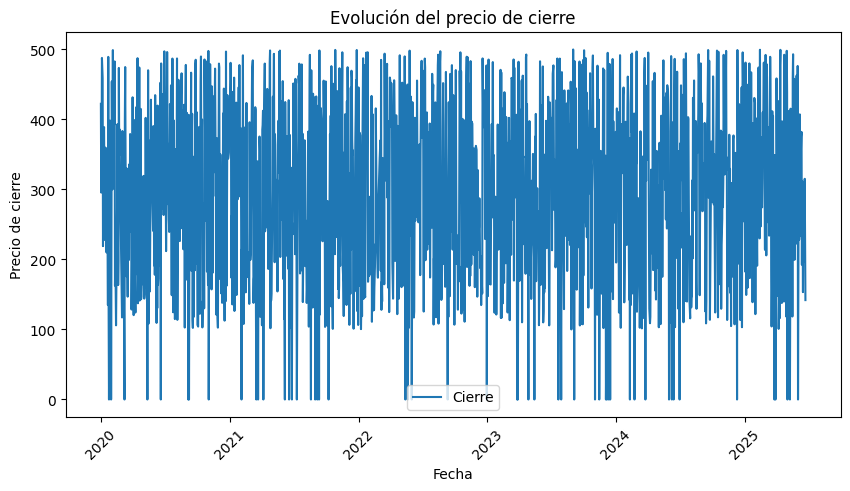

In [28]:
# Graficar evolución del precio de cierre
plt.figure(figsize=(10,5))
plt.plot(df['fecha'], df['cierre'], label='Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Evolución del precio de cierre')
plt.xticks(rotation=45)
plt.legend()
plt.show()

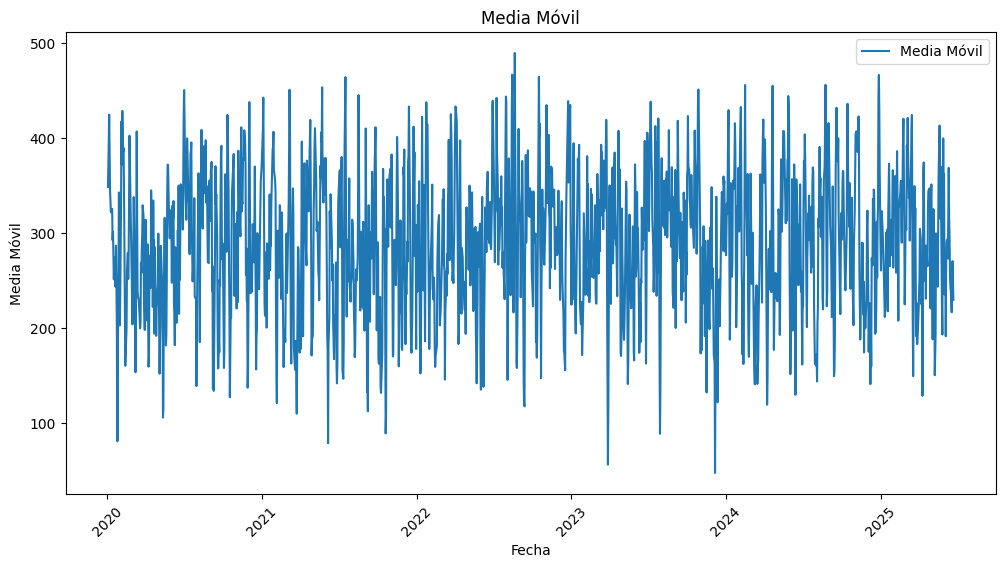

In [30]:


# Graficar solo la media móvil
plt.figure(figsize=(12,6))
plt.plot(df['fecha'], df['media_movil'], label='Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Media Móvil')
plt.title('Media Móvil')
plt.xticks(rotation=45)
plt.legend()
plt.show()


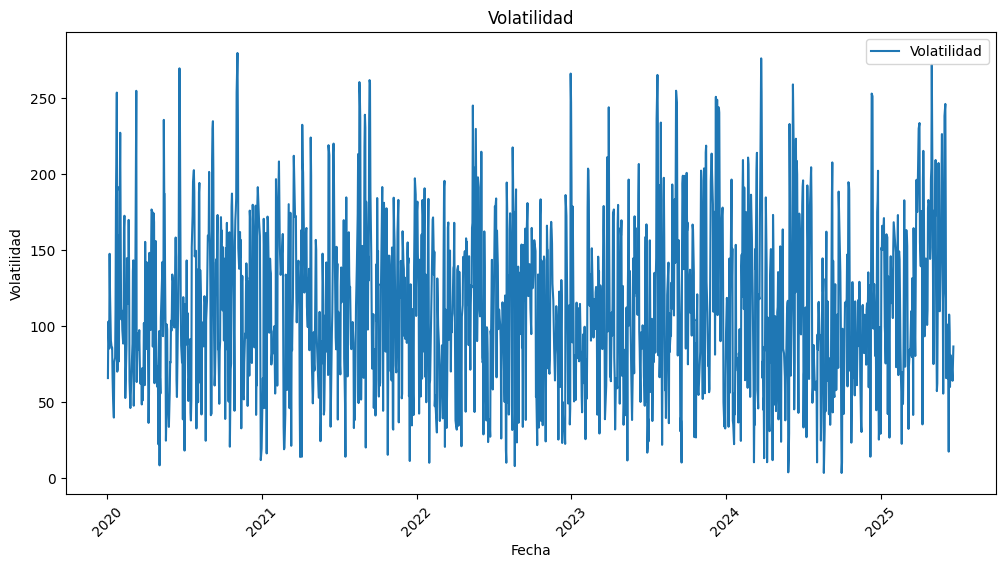

In [32]:


# Graficar solo la volatilidad
plt.figure(figsize=(12,6))
plt.plot(df['fecha'], df['volatilidad'], label='Volatilidad')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad')
plt.xticks(rotation=45)
plt.legend()
plt.show()


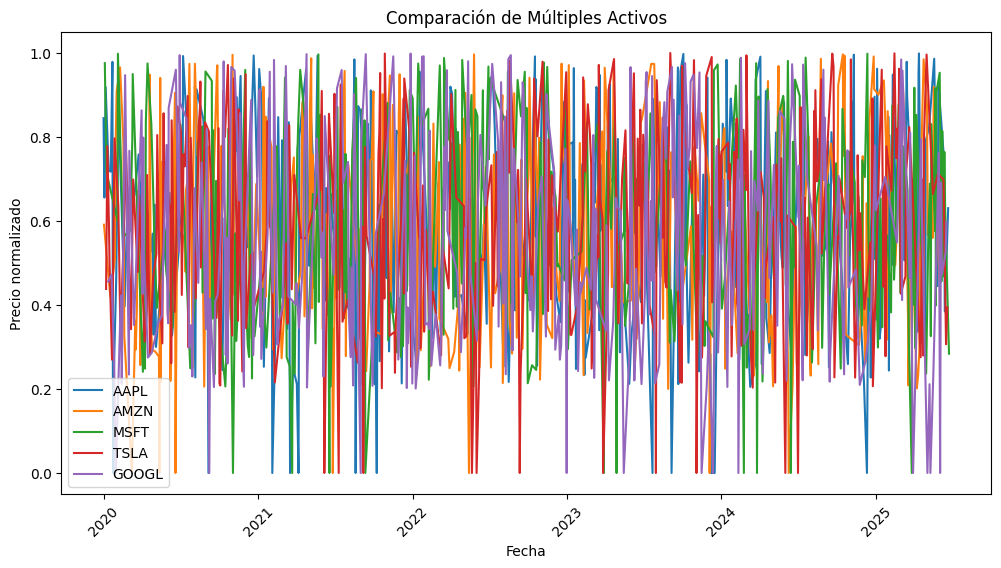

In [33]:
# Comparar múltiples activos usando precios de cierre normalizados
plt.figure(figsize=(12,6))

for ticker in df['ticker'].unique():
    df_activo = df[df['ticker'] == ticker]
    plt.plot(df_activo['fecha'], df_activo['cierre_normalizado'], label=ticker)

plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.title('Comparación de Múltiples Activos')
plt.xticks(rotation=45)
plt.legend()
plt.show()